In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
# 노트북 안에 그래프 그리기
%matplotlib inline
# 그래프 격자로 숫자 범위가 눈에 잘 띄도록 ggplot 스타일 사용
plt.style.use('ggplot')
# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus']=False
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Data
- date - Date of the sale data. There are no holiday effects or store closures.
- store - Store ID (1-10)
- item - Item ID (1-50)
- sales - Number of items sold at a particular store on a particular date.

In [2]:
train.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [3]:
test.head()

,id,date,store,item
0,0,2018-01-01,1,1
1,1,2018-01-02,1,1
2,2,2018-01-03,1,1
3,3,2018-01-04,1,1
4,4,2018-01-05,1,1


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
date     913000 non-null object
store    913000 non-null int64
item     913000 non-null int64
sales    913000 non-null int64
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 4 columns):
id       45000 non-null int64
date     45000 non-null object
store    45000 non-null int64
item     45000 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.4+ MB


- train과 test 데이터셋에 결측값은 없다.

## 시계열 데이터이므로 먼저 날짜에 따른 sales값을 살펴보기 위해 date 변수에 있는 데이터를 날짜로 인식하게 한다.
## 그 후 날짜에서 뽑아낼 수 있는 특성들을 뽑아낸다.

In [6]:
com=[train,test]
for i in com:
    i['date']=pd.to_datetime(i['date']) # 데이터를 날짜로 인식하게 해주는 함수
    
    i['year']=i['date'].dt.year # 년(年)을 뽑아내는 함수
    
    i['month']=i['date'].dt.month # 월(月)을 뽑아내는 함수
    
    i['dayofmonth']=i['date'].dt.day # 일(日)을 뽑아내는 함수
    
    i['dayofweek']=i['date'].dt.dayofweek # 요일을 뽑아내는 함수 (월화수목금토일 순으로 0 부터 6)
    
    i['dayofyear']=i['date'].dt.dayofyear # 1년 안에서 몇번 째 일인지 뽑아내는 함수
    
    i['weekofyear']=i['date'].dt.weekofyear # 1년 안에서 몇번 째 주인지 뽑아내는 함수
train.head()

,date,store,item,sales,year,month,dayofmonth,dayofweek,dayofyear,weekofyear
0,2013-01-01,1,1,13,2013,1,1,1,1,1
1,2013-01-02,1,1,11,2013,1,2,2,2,1
2,2013-01-03,1,1,14,2013,1,3,3,3,1
3,2013-01-04,1,1,13,2013,1,4,4,4,1
4,2013-01-05,1,1,10,2013,1,5,5,5,1


In [7]:
test.head()

,id,date,store,item,year,month,dayofmonth,dayofweek,dayofyear,weekofyear
0,0,2018-01-01,1,1,2018,1,1,0,1,1
1,1,2018-01-02,1,1,2018,1,2,1,2,1
2,2,2018-01-03,1,1,2018,1,3,2,3,1
3,3,2018-01-04,1,1,2018,1,4,3,4,1
4,4,2018-01-05,1,1,2018,1,5,4,5,1


# eda & feature engineering

### sales의 분포

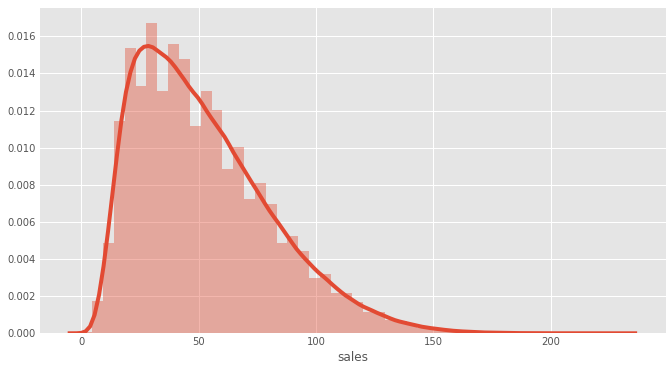

In [8]:
plt.figure(figsize=(10,6))
sns.distplot(train['sales'])

- sales변수의 분포는 왼쪽으로 치우쳐진 오른쪽으로 꼬리가 긴 분포를 띈다.

## 각각 년도, 월, 요일, 일에 따른 sales분포이다. 

[Text(0, 0.5, 'sales'),
 Text(0.5, 0, 'dayofyear'),
 Text(0.5, 1.0, 'sales of dayofyear')]

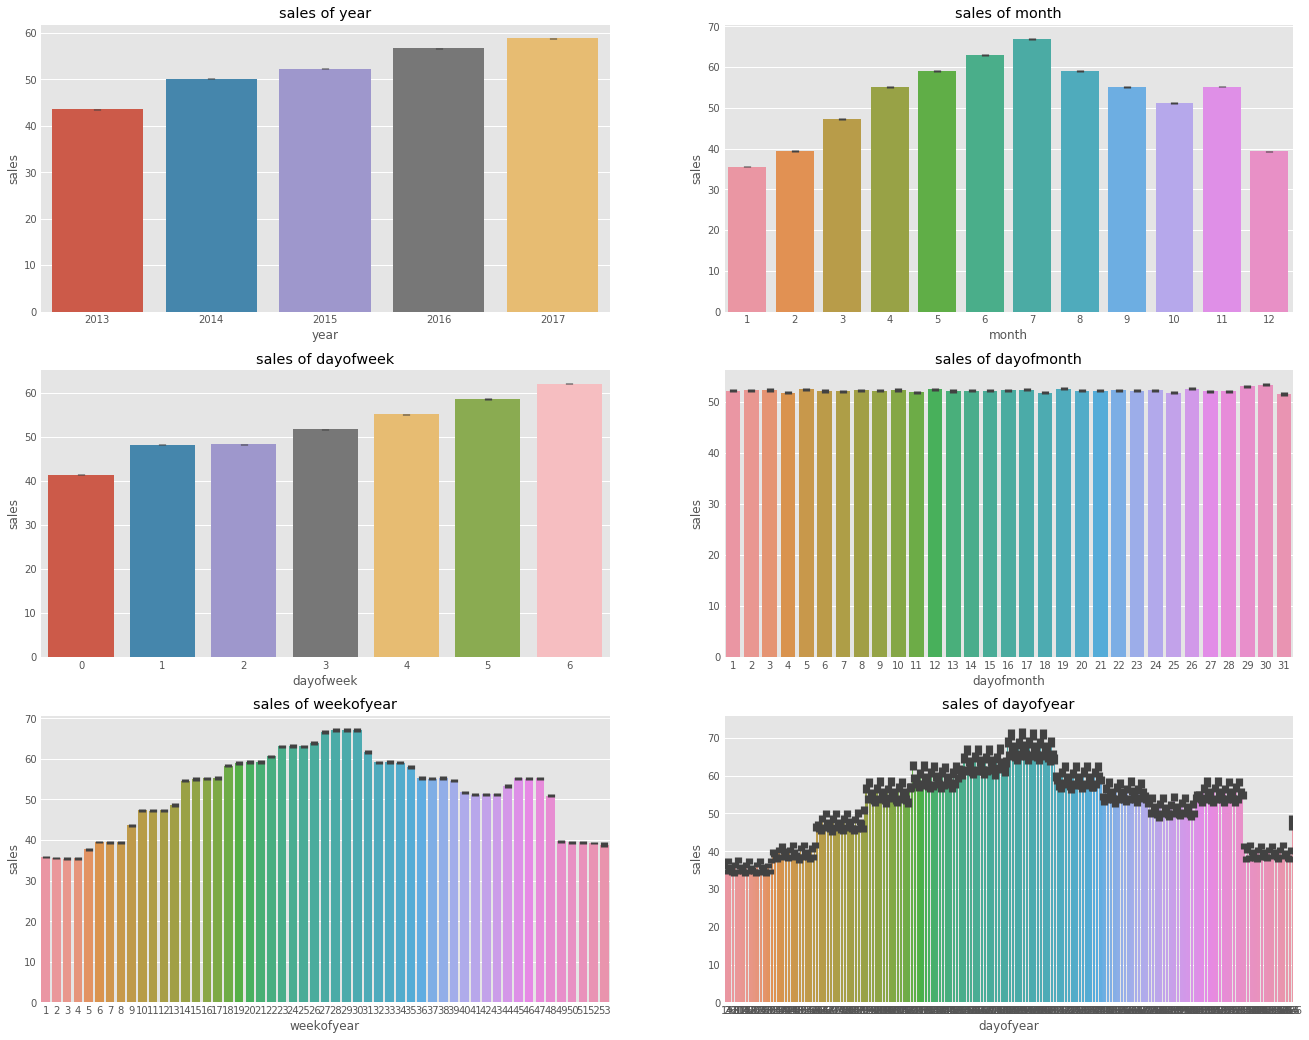

In [9]:
fig,ax=plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(20,18)

sns.barplot(data=train,x='year',y='sales',ax=ax[0,0])
sns.barplot(data=train,x='month',y='sales',ax=ax[0,1])
sns.barplot(data=train,x='dayofweek',y='sales',ax=ax[1,0])
sns.barplot(data=train,x='dayofmonth',y='sales',ax=ax[1,1])
sns.barplot(data=train,x='weekofyear',y='sales',ax=ax[2,0])
sns.barplot(data=train,x='dayofyear',y='sales',ax=ax[2,1])

ax[0,0].set(xlabel='year',ylabel='sales',title='sales of year')
ax[0,1].set(xlabel='month',ylabel='sales',title='sales of month')
ax[1,0].set(xlabel='dayofweek',ylabel='sales',title='sales of dayofweek')
ax[1,1].set(xlabel='dayofmonth',ylabel='sales',title='sales of dayofmonth')
ax[2,0].set(xlabel='weekofyear',ylabel='sales',title='sales of weekofyear')
ax[2,1].set(xlabel='dayofyear',ylabel='sales',title='sales of dayofyear')

## weekofyear변수와 dayofweek변수를 binning 하여 season, weekday변수 생성
### season의 범주는 임의대로 설정하였다.

In [10]:
for df in [train]:
    df.loc[(df['weekofyear']<=9) | (df['weekofyear']>=49),'season'] = 1  # wintet
    df.loc[(df['weekofyear']>9) & (df['weekofyear']<=22),'season'] = 2   # spring
    df.loc[(df['weekofyear']>22) & (df['weekofyear']<=35),'season'] = 3  # summer
    df.loc[(df['weekofyear']>35) & (df['weekofyear']<=48),'season'] = 4  # fall
    
    df.loc[df['dayofweek']<=4,'weekday'] = 1  # weekday
    df.loc[df['dayofweek']>4,'weekday'] = 0   # weekend
train.head()

,date,store,item,sales,year,month,dayofmonth,dayofweek,dayofyear,weekofyear,season,weekday
0,2013-01-01,1,1,13,2013,1,1,1,1,1,1.0,1.0
1,2013-01-02,1,1,11,2013,1,2,2,2,1,1.0,1.0
2,2013-01-03,1,1,14,2013,1,3,3,3,1,1.0,1.0
3,2013-01-04,1,1,13,2013,1,4,4,4,1,1.0,1.0
4,2013-01-05,1,1,10,2013,1,5,5,5,1,1.0,0.0


## item별 store별 sales의 분포

[Text(0, 0.5, 'sales'),
 Text(0.5, 0, 'store'),
 Text(0.5, 1.0, 'Mean sales by store')]

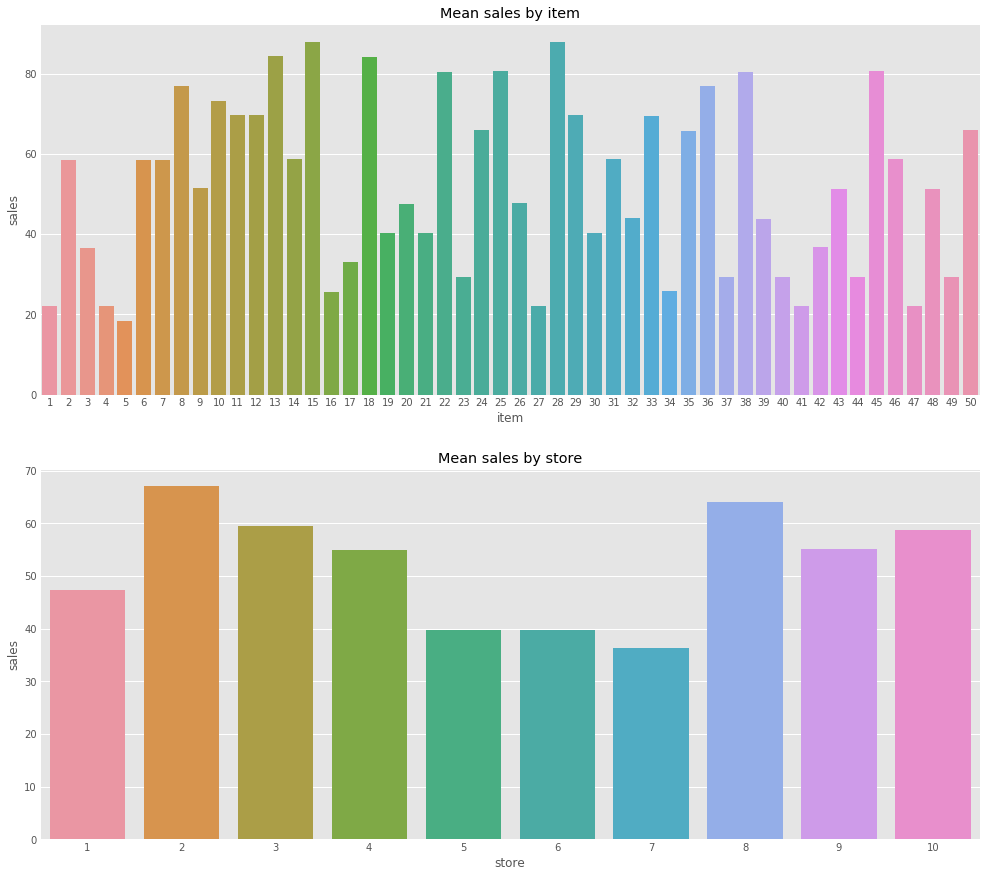

In [11]:
itemgroup=train.groupby(['item']).mean()
storegroup=train.groupby(['store']).mean()

fig,ax=plt.subplots(nrows=2,ncols=1)
fig.set_size_inches(15,15)

sns.barplot(data=itemgroup,x=itemgroup.index,y='sales',ax=ax[0])
sns.barplot(data=storegroup,x=storegroup.index,y='sales',ax=ax[1])

ax[0].set(xlabel='item',ylabel='sales',title='Mean sales by item')
ax[1].set(xlabel='store',ylabel='sales',title='Mean sales by store')

## store별 월별 total sales 분포

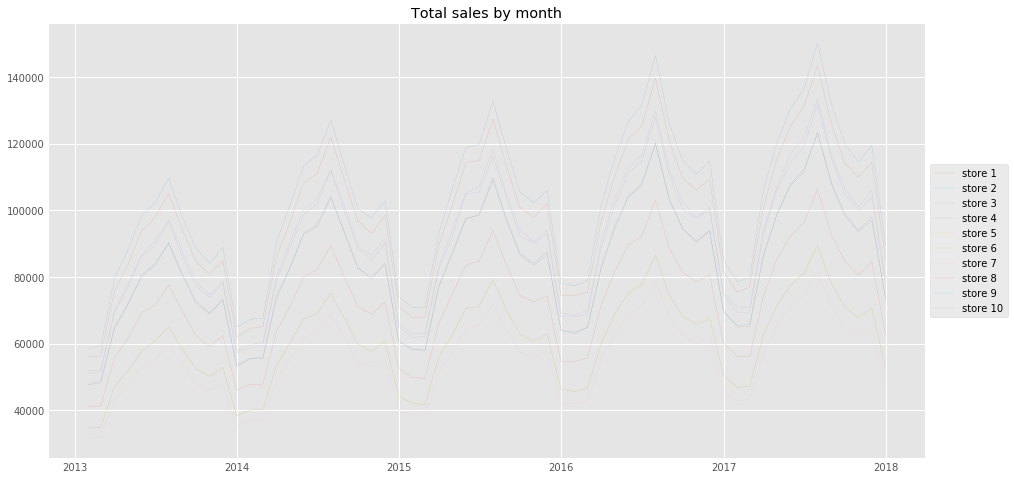

In [13]:
for i in range(1,11):
    month_df = train[train['store']==i].resample('M',on='date').sum()
    x = np.array(month_df.index)
    y = np.array(month_df.sales)
    plt.plot(x,y,label = 'store %s' % i)
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.rcParams["figure.figsize"] = (14,8)
plt.rcParams['lines.linewidth'] = 0.1
plt.title("Total sales by month")
plt.show()

## boxplot으로 본 sales 분포

[Text(0, 0.5, 'sales'),
 Text(0.5, 0, 'dayofmonth'),
 Text(0.5, 1.0, 'sales of dayofmonth')]

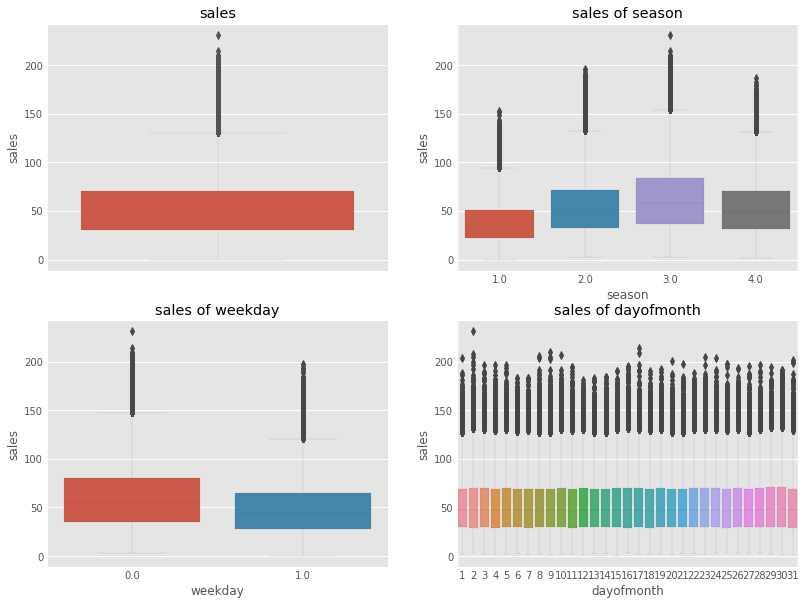

In [14]:
fig,ax=plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12,10)
sns.boxplot(data=train,y='sales',orient='v',ax=ax[0,0])
sns.boxplot(data=train,y='sales',x='season',orient='v',ax=ax[0,1])
sns.boxplot(data=train,y='sales',x='weekday',orient='v',ax=ax[1,0])
sns.boxplot(data=train,y='sales',x='dayofmonth',orient='v',ax=ax[1,1])

ax[0,0].set(ylabel='sales',title = 'sales')
ax[0,1].set(xlabel='season',ylabel='sales',title='sales of season')
ax[1,0].set(xlabel='weekday',ylabel='sales',title='sales of weekday')
ax[1,1].set(xlabel='dayofmonth',ylabel='sales',title='sales of dayofmonth')

## train 데이터와 test 데이터를 합쳐서 전처리한다.(pd.concat() 함수 사용하여 위아래로 합침)
### index 중복은 발생하지만 순서만 바뀌지 않으면 상관없고, 날짜가 다르기 때문에 상관없다.
### test 데이터셋에는 sales변수가 없어서 파생변수를 만들 때 결측값으로 들어가기 때문에 합쳐서 전처리해준다. 이는 후에 자세히 설명한다.

In [16]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [17]:
sid = pd.concat([train,test])
sid.head()

,date,id,item,sales,store
0,2013-01-01,NaN,1,13.0,1
1,2013-01-02,NaN,1,11.0,1
2,2013-01-03,NaN,1,14.0,1
3,2013-01-04,NaN,1,13.0,1
4,2013-01-05,NaN,1,10.0,1


## 위에서 했던 전처리 작업 다시 수행

In [18]:
sid['date'] = pd.to_datetime(sid['date'])
sid['dayofmonth'] = sid['date'].dt.day
sid['month'] = sid['date'].dt.month
sid['dayofweek'] = sid['date'].dt.dayofweek
sid['year'] = sid['date'].dt.year
sid['weekofyear'] = sid['date'].dt.weekofyear
sid['dayofyear'] = sid['date'].dt.dayofyear
sid.head()

,date,id,item,sales,store,dayofmonth,month,dayofweek,year,weekofyear,dayofyear
0,2013-01-01,NaN,1,13.0,1,1,1,1,2013,1,1
1,2013-01-02,NaN,1,11.0,1,2,1,2,2013,1,2
2,2013-01-03,NaN,1,14.0,1,3,1,3,2013,1,3
3,2013-01-04,NaN,1,13.0,1,4,1,4,2013,1,4
4,2013-01-05,NaN,1,10.0,1,5,1,5,2013,1,5


In [19]:
for df in [sid]:
    df.loc[(df['weekofyear']<=9) | (df['weekofyear']>=49),'season'] = 1 # winter
    df.loc[(df['weekofyear']>9) & (df['weekofyear']<=22),'season'] = 2  # spring
    df.loc[(df['weekofyear']>22) & (df['weekofyear']<=35),'season'] = 3 # summer
    df.loc[(df['weekofyear']>35) & (df['weekofyear']<=48),'season'] = 4 # fall
    df.loc[df['dayofweek']<=4,'weekday'] = 1
    df.loc[df['dayofweek']>4,'weekday'] = 0

## 함수설명점 ㅎ
### 이 함수를 써서 파생변수를 만들 때 test 데이터셋에는 sales변수가 없어서 NaN이 들어가게 된다. 그래서 train과 test를 합쳐서 NaN값이 들어가지 않게 했다.

In [20]:
def mean_cols(data,cols):
    for i in cols:
        data['mean_'+i] = data.groupby(['item','store',i])['sales'].transform('mean')
    return data

### 만든 함수를 적용해 파생변수를 만든다.

In [21]:
mean_cols(sid,['dayofweek','weekofyear','month','season','weekday'])
sid.columns

Index(['date', 'id', 'item', 'sales', 'store', 'dayofmonth', 'month',
       'dayofweek', 'year', 'weekofyear', 'dayofyear', 'season', 'weekday',
       'mean_dayofweek', 'mean_weekofyear', 'mean_month', 'mean_season',
       'mean_weekday'],
      dtype='object')

In [22]:
sid.isna().sum()

date                    0
id                 913000
item                    0
sales               45000
store                   0
dayofmonth              0
month                   0
dayofweek               0
year                    0
weekofyear              0
dayofyear               0
season                  0
weekday                 0
mean_dayofweek          0
mean_weekofyear         0
mean_month              0
mean_season             0
mean_weekday            0
dtype: int64

In [23]:
sid.head()

,date,id,item,sales,store,dayofmonth,month,dayofweek,year,weekofyear,dayofyear,season,weekday,mean_dayofweek,mean_weekofyear,mean_month,mean_season,mean_weekday
0,2013-01-01,NaN,1,13.0,1,1,1,1,2013,1,1,1.0,1.0,18.168582,13.970588,13.709677,14.401302,18.605061
1,2013-01-02,NaN,1,11.0,1,2,1,2,2013,1,2,1.0,1.0,18.793103,13.970588,13.709677,14.401302,18.605061
2,2013-01-03,NaN,1,14.0,1,3,1,3,2013,1,3,1.0,1.0,19.452107,13.970588,13.709677,14.401302,18.605061
3,2013-01-04,NaN,1,13.0,1,4,1,4,2013,1,4,1.0,1.0,21.015326,13.970588,13.709677,14.401302,18.605061
4,2013-01-05,NaN,1,10.0,1,5,1,5,2013,1,5,1.0,0.0,22.973180,13.970588,13.709677,14.401302,23.385057


In [24]:
sid.tail()

,date,id,item,sales,store,dayofmonth,month,dayofweek,year,weekofyear,dayofyear,season,weekday,mean_dayofweek,mean_weekofyear,mean_month,mean_season,mean_weekday
44995,2018-03-27,44995.0,50,NaN,10,27,3,1,2018,13,86,2.0,1.0,67.777778,68.771429,67.780645,77.314286,69.480828
44996,2018-03-28,44996.0,50,NaN,10,28,3,2,2018,13,87,2.0,1.0,68.823755,68.771429,67.780645,77.314286,69.480828
44997,2018-03-29,44997.0,50,NaN,10,29,3,3,2018,13,88,2.0,1.0,73.532567,68.771429,67.780645,77.314286,69.480828
44998,2018-03-30,44998.0,50,NaN,10,30,3,4,2018,13,89,2.0,1.0,78.275862,68.771429,67.780645,77.314286,69.480828
44999,2018-03-31,44999.0,50,NaN,10,31,3,5,2018,13,90,2.0,0.0,82.854406,68.771429,67.780645,77.314286,85.419540


### 합쳤던 데이터셋을 다시 train과 test로 나눈다.

In [30]:
train = sid.loc[~df['sales'].isna()]
test = sid.loc[df['sales'].isna()]

In [31]:
print(train.shape,test.shape)

(913000, 18) (45000, 18)


### 사용하지 않을 변수들은 지우고, sales변수는 y로 지정해준다.

In [32]:
x_train = train.drop(['date','sales','id'],axis=1)
y_train = train['sales'].values
x_test = test.drop(['date','sales','id'],axis=1)

In [33]:
x_train.isnull().sum()

item               0
store              0
dayofmonth         0
month              0
dayofweek          0
year               0
weekofyear         0
dayofyear          0
season             0
weekday            0
mean_dayofweek     0
mean_weekofyear    0
mean_month         0
mean_season        0
mean_weekday       0
dtype: int64

# Modeling

In [23]:
import xgboost as xgb
params = {
    'colsample_bytree':1,
    'eta':0.1,
    'eval_metric':'mae',
    'max_depth':3,
    'objective':'reg:linear',
    'silent': 1,
    'subsample':1,
}
xgbtrain = xgb.DMatrix(x_train, label=y_train)
xgbmodel = xgb.train(list(params.items()), 
                     xgbtrain, 
                     early_stopping_rounds=50,
                     evals=[(xgbtrain, 'train')], 
                     num_boost_round=200, 
                     verbose_eval=50)

[0]	train-mae:46.5883
Will train until train-mae hasn't improved in 50 rounds.
[50]	train-mae:4.0867
[100]	train-mae:3.52866
[150]	train-mae:3.35318
[199]	train-mae:3.25543


In [24]:
model = xgbmodel
predict=pd.DataFrame(model.predict(xgb.DMatrix(x_test),ntree_limit=model.best_ntree_limit),columns=['sales'])

In [25]:
ids=pd.read_csv("test.csv",usecols=['id'])
predict=np.round(predict)
sub=ids.join(predict)
sub

In [87]:
sub.to_csv('submission.csv',index=False)

In [76]:
# def SMAPE (forecast, actual):
#     masked_arr = ~((forecast==0)&(actual==0))
#     diff = abs(forecast[masked_arr] - actual[masked_arr])
#     avg = (abs(forecast[masked_arr]) + abs(actual[masked_arr]))/2
    
#     print('SMAPE Error Score: ' + str(round(sum(diff/avg)/len(forecast) * 100, 2)) + ' %')